In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
from IPython.display import display  # For displaying images
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision import datasets, models, transforms
from torchvision.io import read_image
import gc
# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# #This was a DATA VISUALISATION CELL, it is not relevant right now anymore
# # Thomas zijn cell

# image_dir = "/kaggle/input/uieb-dataset-raw/raw-890"
# max_images_to_display = 1  # Set the maximum number of images to display (optional)
# image_count = 0

# for filename in os.listdir(image_dir):
#     print(filename)
#     if filename.endswith((".jpg", ".jpeg", ".png", ".gif")):  # Check for common image formats
#         image_path = os.path.join(image_dir, filename)
#         try:
#             img = plt.imread(image_path)
#             plt.imshow(img)
#             plt.axis('off')
#             plt.show()# Hide axes for cleaner display

#             image_count += 1
#             if image_count == max_images_to_display:
#                 break  # Limit the number of displayed images (optional)

#         except Exception as e:
#             print(f"Error displaying image {filename}: {e}")


In [4]:
# #CLAHE algoritm - Dave 
# #PRECOMPUTED, so commented out
# def apply_clahe(input_dir, output_dir, calculate_metrics=False):
#     # Create output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Get list of raw image filenames
#     raw_images = [f for f in os.listdir(input_dir) if f.endswith('.png')]

#     # Apply CLAHE to each image
#     for idx, filename in enumerate(raw_images):
#         # Step 1: Load raw image
#         image = cv2.imread(os.path.join(input_dir, filename))

#         # Step 2: Convert RGB image to YCbCr
#         ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

#         # Step 3: Compute histogram equalization for Y channel
#         y_channel = ycbcr_image[:, :, 0]
#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#         equalized_y_channel = clahe.apply(y_channel)

#         # Step 4: Convert YCbCr back to RGB
#         ycbcr_image[:, :, 0] = equalized_y_channel
#         clahe_image = cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2BGR)

#         # Step 5: Calculate PSNR and entropy if requested
#         if calculate_metrics:
#             original_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#             enhanced_gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
#             mse = np.mean((original_image - enhanced_gray) ** 2)
#             if mse == 0:
#                 psnr = 100
#             else:
#                 max_pixel = 255.0
#                 psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

#             hist = cv2.calcHist([enhanced_gray], [0], None, [256], [0, 256])
#             hist = hist.ravel() / hist.sum()
#             entropy = -np.sum(hist * np.log2(hist + np.finfo(float).eps))

#             print("Image:", filename)
#             print("PSNR:", psnr)
#             print("Entropy:", entropy)

#         # Save enhanced image
#         cv2.imwrite(os.path.join(output_dir, filename.replace('.png', '_clahe.png')), clahe_image)

#         # Display raw image and enhanced image side by side for the first image
#         if idx < 1:
#             fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#             axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#             axes[0].axis('off')
#             axes[0].set_title("Raw Image")
#             axes[1].imshow(cv2.cvtColor(clahe_image, cv2.COLOR_BGR2RGB))
#             axes[1].axis('off')
#             axes[1].set_title("CLAHE Image")
#             plt.show()

# if __name__ == "__main__":
#     input_dir = '/kaggle/input/uieb-dataset-raw/raw-890'
#     output_dir = '/kaggle/working/clahe-images'
#     apply_clahe(input_dir, output_dir, calculate_metrics=False)




In [5]:

#PRECOMPUTED, so commented out
# def white_balance_dataset(input_dir, output_dir, lambda_value):
#     """
#     Performs white balance on a dataset of images using the White Balance algorithm described in the paper.

#     Args:
#         input_dir: The directory containing the input images in BGR format.
#         output_dir: The directory where the white balanced images will be saved.
#         lambda_value: The parameter lambda to regulate the lighting estimate.

#     Returns:
#         None
#     """
#     # Create output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Get list of image filenames
#     images = [f for f in os.listdir(input_dir) if f.endswith('.png')]

#     # Process each image
#     for idx, filename in enumerate(images):
#         # Step 1: Load raw image
#         raw_image = cv2.imread(os.path.join(input_dir, filename))

#         # Step 2: White balance the image
        
#         # Convert image to RGB
#         image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

#         # Calculate the average intensity for each channel
#         avg_intensity = np.mean(image, axis=(0, 1)) / 255
        
#         lighting_estimate = 0.5 + 0.2 * avg_intensity
#         #print(lighting_estimate)
        
#         # Calculate the average gray value
#         gray_value = np.mean(lighting_estimate)
#         #print(gray_value)

#         # Calculate the lighting estimate 𝜇𝑖 = 0.5 + 𝜆 * 𝜇𝑠𝑐𝑒
#         #lighting_estimate = 128 + 0.1 * gray_value

#         # White balance the image by adjusting channel intensity
#         white_balanced_image = (image / avg_intensity) * (gray_value)

# #         # Clip values to the valid range [0, 255]
#         white_balanced_image = np.clip(white_balanced_image, 0, 255)

#         # Convert the image back to BGR 
#         white_balanced_image = cv2.cvtColor(white_balanced_image.astype(np.uint8), cv2.COLOR_RGB2BGR)


# #         # Convert image to RGB
# #         image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# #         # Get image dimensions
# #         (rows, cols, channels) = image.shape

# #         # Initialize variables for accumulating intensity
# #         red_sum = 0
# #         green_sum = 0
# #         blue_sum = 0

# #         # Loop through each pixel and accumulate intensity for each channel
# #         for row in range(rows):
# #             for col in range(cols):
# #                 pixel = image[row, col]
# #                 red_sum += pixel[0]
# #                 green_sum += pixel[1]
# #                 blue_sum += pixel[2]

# #         # Calculate average intensity for each channel
# #         avg_red = red_sum / (rows * cols)
# #         avg_green = green_sum / (rows * cols)
# #         avg_blue = blue_sum / (rows * cols)

# #         # Calculate overall average intensity
# #         avg_intensity = (avg_red + avg_green + avg_blue) / 3

# #         # Calculate the lighting estimate 𝜇𝑖 = 0.5 + 𝜆 * 𝜇𝑠𝑐𝑒
# #         lighting_estimate = 128 + lambda_value * avg_intensity

# #         # White balance the image by adjusting channel intensity
# #         for row in range(rows):
# #             for col in range(cols):
# #                 pixel = image[row, col]
# #                 image[row, col] = (pixel[0] * (avg_intensity / avg_red),
# #                                    pixel[1] * (avg_intensity / avg_green),
# #                                    pixel[2] * (avg_intensity / avg_blue))

# # #         # Clip values to the valid range [0, 255]
# #         image = np.clip(image, 0, 255)

# #         # Convert the image back to BGR 
# #         white_balanced_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2BGR)
        
#         # Step 3: Save the white balanced image
#         output_filename = os.path.join(output_dir, filename.replace('.png', '_white_balanced.png'))
#         cv2.imwrite(output_filename, white_balanced_image)

#         # Step 4: Display raw image and white balanced image side by side for the first image
#         if idx < 1:
#             fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#             axes[0].imshow(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB))
#             axes[0].axis('off')
#             axes[0].set_title("Raw Image")
#             axes[1].imshow(cv2.cvtColor(white_balanced_image, cv2.COLOR_BGR2RGB))
#             axes[1].axis('off')
#             axes[1].set_title("White Balanced Image")
#             plt.show()

# # Example usage:
# input_dir = '/kaggle/input/uieb-dataset-raw/raw-890'
# output_dir = '/kaggle/working/wb-images'
# lambda_value = 0.2 
# white_balance_dataset(input_dir, output_dir, lambda_value)


In [27]:
# Residual Enhancment Module

class ResidualEnhancementModule(nn.Module):
    """Residual Enhancement Module for underwater image enhancement.

    Args:
        in_channels (int): Number of channels in the input image.
    """

    def __init__(self, in_channels):
        super(ResidualEnhancementModule, self).__init__()

        self.conv1_1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu1_1 = nn.GELU()
        self.conv1_2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu1_2 = nn.GELU()
        self.conv1_3 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu1_3 = nn.GELU()
        self.conv1_4 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        
        
        self.conv2_1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu2_1 = nn.GELU()
        self.conv2_2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu2_2 = nn.GELU()
        self.conv2_3 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.gelu2_3 = nn.GELU()
        self.conv2_4 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        
#         self.conv3ch = nn.Conv2d(in_channels, 3, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        out_1 = self.conv1_1(x)
        out_1 = self.gelu1_1(out_1)
        out_1 = self.conv1_2(out_1)
        out_1 = self.gelu1_2(out_1)
        out_1 = self.conv1_3(out_1)
        out_1 = self.gelu1_3(out_1)
        out_1 = self.conv1_4(out_1) + x
        
        out_2 = self.conv2_1(out_1)
        out_2 = self.gelu2_1(out_2)
        out_2 = self.conv2_2(out_2)
        out_2 = self.gelu2_2(out_2)
        out_2 = self.conv2_3(out_2)
        out_2 = self.gelu2_3(out_2)
        out_2 = self.conv2_4(out_2) + out_1
        
#         out_2 = self.conv3ch(out_2)
        
        return out_2

In [7]:
# # TEST CELL REM

# image_dir = "/kaggle/input/uieb-dataset-raw/raw-890"

# for filename in os.listdir(image_dir):
#     image_path = os.path.join(image_dir, filename)
#     img = plt.imread(image_path)
#     break

# img = torch.from_numpy(img).float()  
# rows, cols, channels = img.shape
# img = img.permute(2, 0, 1)
# print("Input shape: ", img.shape)
# rem = ResidualEnhancementModule(channels)
# output = rem(img)
# print("Ouput shape: ", output.shape) 

# #In order to print image
# image = output.permute(1, 2, 0)
# image = image.cpu().detach().numpy()
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [28]:
class MFFModule(nn.Module):
    """
    Multi-Receptive Field Fusion module with channel shuffle.
    """
    def __init__(self, in_channels):
        super(MFFModule, self).__init__()
        # Define individual convolution layers with different kernel sizes
        self.conv1 = nn.Conv2d(in_channels, in_channels, kernel_size=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels, in_channels, kernel_size=5, padding=2)
        self.catconv3 = nn.Conv2d(in_channels*3, in_channels, kernel_size=3, padding=1)
        self.shuffle = nn.ChannelShuffle(3)
    def forward(self, rem1_out, rem2_out, rem3_out):
        """
        Performs the MFF operation on the input tensor.

        Args:
            x: Input tensor (shape: [batch_size, channels, height, width])

        Returns:
            Tensor with enhanced feature representation
        """
        # Extract features using convolutions with different kernel sizes
        out1 = F.gelu(self.conv1(rem1_out))

        out2 = F.gelu(self.conv3(rem2_out))
        out3 = F.gelu(self.conv5(rem3_out))

        out1 = out1 + rem1_out
        out2 = out2 + rem2_out
        out3 = out3 + rem3_out

        # Concatenate the feature maps along the channel dimension
        out = torch.cat((out1, out2, out3), dim=0)
        
        # You can comment out this section if channel shuffle is not desired
#         out = self.shuffle(out)  # Replace 1 with the desired number of groups

        out = self.catconv3(out)

        return out

# Function for channel shuffle (same as previous explanation)
# def channel_shuffle(x, groups):
#     batch_size, channels, height, width = x.shape
#     x = x.view(batch_size, groups, channels // groups, height, width)
#     x = torch.chunk(x, groups, dim=2)
#     x = torch.cat(x, dim=1)
#     return x.view(batch_size, -1, height, width)

In [29]:
# pixel weigthed channel attention module - maurits

class PCAM(nn.Module):
    def __init__(self, in_channels):
        super(PCAM, self).__init__()
        self.conv3x3 = nn.Conv2d(in_channels=in_channels, out_channels=in_channels, kernel_size=3, padding=1)
        self.conv1x1 = nn.Conv2d(in_channels=in_channels, out_channels=in_channels, kernel_size=1, padding=0)
        self.conv3x3_2 = nn.Conv2d(in_channels=in_channels, out_channels=in_channels, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_channels, in_channels)
        self.fc2 = nn.Linear(in_channels, in_channels)
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

    def forward(self, x):
        F_in = x
        F_n = F.gelu(self.conv3x3(x))  # Equation 5 feature localization
        S_1 = F.sigmoid(self.conv1x1(F_n))  # Spatial weights
        S_2 = self.conv3x3_2(F_n)
        Mult1 = torch.mul(S_1, S_2) # Equation 6

        o = self.avgpool(Mult1).view(9)  # Global average pooling (Equation 7)
        f1 = F.gelu(self.fc1(o)) # equation 8
        f2 = F.sigmoid(self.fc2(f1))
        Mult2 = torch.mul(F_n, f2[:, None, None])  # Final attention map
        out = F_in + Mult1 + Mult2  # (Equation 9)
#         print(out.shape)
        return out

In [30]:
def pad_ds(image_tensor):
    """
    Pad the image tensor to make its dimensions divisible by 2.
    
    Args:
    - image_tensor (torch.Tensor): Input image tensor of shape (C, H, W).
    
    Returns:
    - padded_image_tensor (torch.Tensor): Padded image tensor.
    """
    # Get the image dimensions
    _, height, width = image_tensor.shape

    # Calculate padding
    pad_height = 0 if height % 2 == 0 else 1
    pad_width = 0 if width % 2 == 0 else 1

    # Pad the image tensor
    padded_image_tensor = torch.nn.functional.pad(image_tensor, (0, pad_width, 0, pad_height))

    return padded_image_tensor, pad_height, pad_width

def pad_remove(image_tensor, pad_height, pad_width):
    
    crop_height = image_tensor.shape[1] - pad_height
    crop_width = image_tensor.shape[2] - pad_width

    # Crop the image tensor
    cropped_image_tensor = image_tensor[:, :crop_height, :crop_width]

    return cropped_image_tensor

In [31]:
# main network architecture
class UnderwaterImageEnhancementNetwork(nn.Module):
    def __init__(self, in_channels): 
        super(UnderwaterImageEnhancementNetwork, self).__init__()
        
        # Residual enhancement module
        self.rem1_branch1 = ResidualEnhancementModule(in_channels)
        self.rem1_branch2 = ResidualEnhancementModule(in_channels)
        self.rem1_branch3 = ResidualEnhancementModule(in_channels)
        
        self.rem2_branch1 = ResidualEnhancementModule(in_channels*3)
        self.rem2_branch2 = ResidualEnhancementModule(in_channels*2)
        self.rem2_branch3 = ResidualEnhancementModule(in_channels)
        
        self.rem3_branch1 = ResidualEnhancementModule(in_channels*9)
        self.rem3_branch2 = ResidualEnhancementModule(in_channels*6)
        self.rem3_branch3 = ResidualEnhancementModule(in_channels*3)
        
        #Extra convolution to get the right number of channels out of the REM2 modules for pixelwise addition
        self.extraconv1 = nn.Conv2d(6, 3, kernel_size=1, stride=1, padding=0)
        self.extraconv2 = nn.Conv2d(9, 3, kernel_size=1, stride=1, padding=0)
        # MFF Fusion module
        self.mffm_branch1 = MFFModule(in_channels)
        self.mffm_branch2 = MFFModule(in_channels)
        self.mffm_branch3 = MFFModule(in_channels)
        # Pixel-weighted channel attention module (PCAM)
        self.pcam1 = PCAM(in_channels*3)
        self.pcam2 = PCAM(in_channels*3)
        self.pcam3 = PCAM(in_channels*3)
        
        # downsample layer by factor of 2 -> stride = 2
        self.downsample = nn.Conv2d(in_channels, in_channels, kernel_size=2, stride=2) 
        
        #upsample layer by factor of 2 -> stride = 2
        self.upsample = nn.ConvTranspose2d(9, 9, kernel_size=2, stride=2)  
        self.upsample2 = nn.ConvTranspose2d(18,18, kernel_size=2, stride=2)
#         # Final convolutional layer(s)
        self.final_conv = nn.Conv2d(27, 3, kernel_size=3, padding=1)
        
    def forward(self, REAL_images, WB_images, CLAHE_images):
        # Residual enhancement on inputs real,wb and clahe
        branch1_rem1 = self.rem1_branch1(REAL_images)
        branch2_rem1 = self.rem1_branch2(WB_images) 
        branch3_rem1 = self.rem1_branch3(CLAHE_images)
        
        # fusion modules on rem outputs
        branch1_mff = self.mffm_branch1(branch1_rem1, branch2_rem1, branch3_rem1)
        branch2_mff = self.mffm_branch2(branch1_rem1, branch2_rem1, branch3_rem1)
        branch3_mff = self.mffm_branch3(branch1_rem1, branch2_rem1, branch3_rem1)
        
        # 2nd rem modules
        branch3_rem2 = self.rem2_branch3(branch3_mff)
        branch2_rem2 = self.rem2_branch2(torch.cat((branch2_mff, branch3_rem2), dim=0))       
        branch1_rem2 = self.rem2_branch1(torch.cat((branch1_mff, branch2_rem2), dim=0))
        
        #extra conv to get right dimensions from 2nd rem modules
        branch2_rem2 = self.extraconv1(branch2_rem2) 
        branch1_rem2 = self.extraconv2(branch1_rem2)
        
        # pixel-wise addition branches
        branch1_addition = branch1_rem2 + REAL_images
        branch2_addition = branch2_rem2 + WB_images
        branch3_addition = branch3_rem2 + CLAHE_images
        

        # 2x down-sampling module 
        #BIG
        branch1_downsample0 = branch1_addition
        branch2_downsample0 = branch2_addition
        branch3_downsample0 = branch3_addition
        #pad to be divisible by two for down-sampling
        branch1_downsample0_pad, padh1, padw1 = pad_ds(branch1_addition)
        branch2_downsample0_pad, _, _ = pad_ds(branch2_addition)
        branch3_downsample0_pad, _, _ = pad_ds(branch3_addition)
        #MID
        branch1_downsample1 = self.downsample(branch1_downsample0_pad)
        branch2_downsample1 = self.downsample(branch2_downsample0_pad)
        branch3_downsample1 = self.downsample(branch3_downsample0_pad)
        #pad to be divisible by two for down-sampling
        branch1_downsample1_pad, padh11, padw11 = pad_ds(branch1_downsample1)
        branch2_downsample1_pad, _, _ = pad_ds(branch2_downsample1)
        branch3_downsample1_pad, _, _ = pad_ds(branch3_downsample1)
        #SMALL
        branch1_downsample2 = self.downsample(branch1_downsample1_pad)
        branch2_downsample2 = self.downsample(branch2_downsample1_pad)
        branch3_downsample2 = self.downsample(branch3_downsample1_pad)
        
        # and dense connection (= organizing channels by size)
        branch1_features_big = torch.cat((branch1_downsample0, branch2_downsample0, branch3_downsample0), dim=0)
        branch2_features_medium = torch.cat((branch1_downsample1, branch2_downsample1, branch3_downsample1), dim=0)
        branch3_features_small =  torch.cat((branch1_downsample2, branch2_downsample2, branch3_downsample2), dim=0)
        
        # pixel weighted channel attention module
        branch1_pcam = self.pcam1(branch1_features_big)
        branch2_pcam = self.pcam2(branch2_features_medium)
        branch3_pcam = self.pcam3(branch3_features_small)
        
        # 3rd rem modules and upsampling (removing the padding used in downsampling to match sizes again)
        branch3_rem3 = self.rem3_branch3(branch3_pcam)
        branch3_rem3_upsampled = pad_remove(self.upsample(branch3_rem3), padh11, padw11)
        
        branch2_rem3 = self.rem3_branch2(torch.cat((branch2_pcam, branch3_rem3_upsampled), dim=0))
        branch2_rem3_upsampled = pad_remove(self.upsample2(branch2_rem3), padh1, padw1)
        
        branch1_rem3 = self.rem3_branch1(torch.cat((branch1_pcam, branch2_rem3_upsampled), dim=0))
        
        # final convolution layer
        output = self.final_conv(branch1_rem3)
        
        return output

In [12]:
# #this is a TEST CELL, UIEN network forward pass
# image_dir = "/kaggle/input/uieb-dataset-raw/raw-890"
# wb_image_dir = "/kaggle/working/wb-images"
# clahe_image_dir = "/kaggle/working/clahe-images"
# for filename in os.listdir(image_dir):
#     image_path = os.path.join(image_dir, filename)
#     image_wb_path = os.path.join(wb_image_dir, filename.replace('.png', '_white_balanced.png'))
#     image_clahe_path = os.path.join(clahe_image_dir, filename.replace('.png', '_clahe.png'))
#     img = plt.imread(image_path)
#     img_wb = plt.imread(image_wb_path)
#     img_clahe = plt.imread(image_clahe_path)
#     break

# img = torch.from_numpy(img).float().permute(2,0,1)
# print(img)
# img_wb = torch.from_numpy(img_wb).float().permute(2,0,1)
# img_clahe = torch.from_numpy(img_clahe).float().permute(2,0,1)

# # rows, cols, channels = img.shape
# # img = img.permute(2, 0, 1)

# print("Input shape: ", img.shape, img_wb.shape, img_clahe.shape)
# in_channels = 3
# UIEN = UnderwaterImageEnhancementNetwork(in_channels) #in_channels is 3, because images are encoded RGB
# output = UIEN(img, img_wb, img_clahe)
# print(output.shape)
# print(output)

# #display output
# # Convert PyTorch tensor to numpy array
# numpy_array = output.detach().numpy()
# numpy_array = (numpy_array*255).astype(np.uint8)
# # Convert numpy array to PIL Image
# image = Image.fromarray(np.transpose(numpy_array, (1, 2, 0)))

# #Display the image
# # display(image)
# plt.imshow(output.detach().permute(1,2,0))

In [13]:
# #NOT WORKING YET
# vgg16 = models.vgg16_bn()

# vgg16.load_state_dict(torch.load("/kaggle/input/vgg16bn/vgg16_bn.pth"))
# # vgg16.to(device)


In [14]:
# # this is a TEST CELL, put the output in a tensor to make it 4D (make it a list)
# # output = torch.tensor(output)
# output4d = output.unsqueeze(0)
# test = vgg16(output4d)
# # print(test)

In [32]:
# Loss function

class CombinedLoss(nn.Module):
    def __init__(self, lambda_perceptual=0.05):
        super(CombinedLoss, self).__init__()
        self.l1_loss = nn.L1Loss()
        self.lambda_perceptual = lambda_perceptual

    def forward(self, reconstructed, ground_truth):
        # L1 loss
        l1 = self.l1_loss(reconstructed, ground_truth) 
        ##perceptual is not working yet, because of vgg16 taking too much memory to load in the features
#         perceptual_loss = self.perceptual_loss(reconstructed, ground_truth)

        # Combine losses
        loss = l1 #+ self.lambda_perceptual * perceptual_loss
        return loss
    
    def perceptual_loss(self, reconstructed, ground_truth):
        # Perceptual loss (using VGG features)
        # This part requires defining a function to extract features from VGG-16
        # Here, it's assumed you have a function `vgg_features(image)` that 
        # takes an image and returns a list of feature maps from VGG layers
        
        perceptual_loss = 0
        reconstructed_features = vgg16(reconstructed.unsqueeze(0))
        ground_truth_features = vgg16(ground_truth.unsqueeze(0))
        
        for i in range(len(reconstructed_features)):
            perceptual_loss += torch.nn.functional.l1_loss(reconstructed_features[i], ground_truth_features[i])
            
        return perceptual_loss

# Example usage
combined_loss = CombinedLoss()
reconstructed_image = torch.rand(1, 3, 256, 256)  # Example image tensor
ground_truth_image = torch.rand(1, 3, 256, 256)  # Example ground truth

# loss = combined_loss(reconstructed_image, ground_truth_image)

# Backward pass for optimization
# loss.backward()

In [33]:
transform = transforms.ToTensor()         # Convert image to tensor

In [17]:
#In order to make an iterable dataset for the training loop, for memory optimization
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_paths, transform=None):
        self.folder_paths = folder_paths
        self.transform = transform
        self.images = os.listdir(folder_paths[0])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.folder_paths[0], self.images[idx])
        img_name_wb = os.path.join(self.folder_paths[1], self.images[idx].replace('.png', '_white_balanced.png'))
        img_name_clahe = os.path.join(self.folder_paths[2], self.images[idx].replace('.png', '_clahe.png'))
        label_name = os.path.join(self.folder_paths[3], self.images[idx])
        image = read_image(img_name)/255
        image_wb = read_image(img_name_wb)/255
        image_clahe = read_image(img_name_clahe)/255
        label = read_image(label_name)/255
        #transform to tensor
        if self.transform:
            image = self.transform(image)
            image_wb = self.transform(image_wb)
            image_clahe = self.transform(image_clahe)
            label = self.transform(label)
#         print(type(image), image.dtype, image.shape) #print for test
        return [image, image_wb, image_clahe, label]

In [18]:
#Folders where the normal, the white balance, the clahe and the reference image are stored respectively
#White Balance and CLAHE were precomputed and put in as saved dataset(see link below), in order to make testing of training loop quicker
#https://www.kaggle.com/datasets/simonmolenkamp/clahe-and-wb-images
folder_paths = ['/kaggle/input/uieb-dataset-raw/raw-890', '/kaggle/input/clahe-and-wb-images/wb-images', '/kaggle/input/clahe-and-wb-images/clahe-images', '/kaggle/input/uieb-dataset-reference/reference-890']
#Making a dataset of all the images by converting them to tensors and putting per image the 4 tensors(normal, wb, clahe and lable) in a list.
dataset = CustomImageDataset(folder_paths)
#creating an iterable dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [19]:
# #Testing of dataloader for dataset
# for batch in dataloader:
#     # Do something with the batch of images (batch is a tensor of shape [batch_size, channels, height, width])
#     print(batch[0].shape, batch[1].shape, batch[2].shape, batch[3].shape)

In [20]:
#Definitions for training loop
model = UnderwaterImageEnhancementNetwork(3)
#compute model on the GPU
model.to(device)
loss_fn = CombinedLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

#Training loop
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(dataloader):
        # Every data instance is an input + label pair
        
        input_normal, input_wb, input_clahe, label = data
        input_normal, input_wb, input_clahe, label = input_normal.cuda(), input_wb.cuda(), input_clahe.cuda(), label.cuda()
        input_normal = input_normal.squeeze(0)
        input_wb = input_wb.squeeze(0)
        input_clahe = input_clahe.squeeze(0)
        label = label.squeeze(0)
#         print(f"This is the input shape: {input_normal.shape}, This would be the shape after downsample: {input_ds.shape}")
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        model.zero_grad()
#         loss.zero_grad()
        # Make predictions for this batch
        output = model(input_normal, input_wb, input_clahe)

        # Compute the loss and its gradients
        loss = loss_fn(output, label)
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        # Gather data and report
        running_loss += loss.item()
        if i % 5 == 0:
            last_loss = running_loss / 5 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(dataloader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

        del input_normal, input_wb, input_clahe, label
        torch.cuda.empty_cache()
        gc.collect()
    return last_loss

In [21]:
# RUNNING THE ENTIRE THING
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 10
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)
    
    model.eval()
    model.zero_grad()
    print('LOSS train {}'.format(avg_loss))
    torch.cuda.empty_cache()
    gc.collect()
    epoch_number += 1

EPOCH 1:
  batch 1 loss: 0.10990182161331177
  batch 6 loss: 0.5412945091724396
  batch 11 loss: 0.43686495423316957
  batch 16 loss: 0.4255774676799774
  batch 21 loss: 0.3789716958999634
  batch 26 loss: 0.2980497360229492
  batch 31 loss: 0.23948305249214172
  batch 36 loss: 0.21007573306560517
  batch 41 loss: 0.17977324724197388
  batch 46 loss: 0.1599648803472519
  batch 51 loss: 0.16409915536642075
  batch 56 loss: 0.13498132824897766
  batch 61 loss: 0.14975209385156632
  batch 66 loss: 0.16260303258895875
  batch 71 loss: 0.12537450790405275
  batch 76 loss: 0.1536116421222687
  batch 81 loss: 0.1354002073407173
  batch 86 loss: 0.11918473988771439
  batch 91 loss: 0.11060277223587037
  batch 96 loss: 0.11520967334508896
  batch 101 loss: 0.11156045198440552
  batch 106 loss: 0.13554117530584336
  batch 111 loss: 0.12269159704446793
  batch 116 loss: 0.127207849919796
  batch 121 loss: 0.15006219893693923
  batch 126 loss: 0.11960635036230087
  batch 131 loss: 0.17131206840276

In [22]:
#save model parameters for future use
torch.save(model.state_dict(), "model_ten_epochs")

In [34]:
#new instance of model for testing purposes
NEW_INSTANCE = UnderwaterImageEnhancementNetwork(3)
NEW_INSTANCE.load_state_dict(torch.load("model_ten_epochs"))

<All keys matched successfully>

In [1]:
# #this is a TEST CELL, output of network after one epoch training
# image_dir = "/kaggle/input/uieb-dataset-raw/raw-890"
# wb_image_dir = "/kaggle/input/clahe-and-wb-images/wb-images"
# clahe_image_dir = "/kaggle/input/clahe-and-wb-images/clahe-images"
# for filename in os.listdir(image_dir):
#     image_path = os.path.join(image_dir, filename)
#     image_wb_path = os.path.join(wb_image_dir, filename.replace('.png', '_white_balanced.png'))
#     image_clahe_path = os.path.join(clahe_image_dir, filename.replace('.png', '_clahe.png'))
#     img = plt.imread(image_path)
#     img_wb = plt.imread(image_wb_path)
#     img_clahe = plt.imread(image_clahe_path)
#     break

# img = torch.from_numpy(img).float().permute(2,0,1)
# img_wb = torch.from_numpy(img_wb).float().permute(2,0,1)
# img_clahe = torch.from_numpy(img_clahe).float().permute(2,0,1)

# print("Input shape: ", img.shape, img_wb.shape, img_clahe.shape)
# in_channels = 3
# output = NEW_INSTANCE(img, img_wb, img_clahe)
# # print(output.shape)
# # print(output)

# #display output
# # Convert PyTorch tensor to numpy array
# numpy_array = output.detach().numpy()
# numpy_array = (numpy_array*255).astype(np.uint8)
# numpy_array_in = img.detach().numpy()
# numpy_array_in = (numpy_array_in*255).astype(np.uint8)
# # Convert numpy array to PIL Image
# image = Image.fromarray(np.transpose(numpy_array, (1, 2, 0)))
# image_in = Image.fromarray(np.transpose(numpy_array_in, (1, 2, 0)))
# #Display the image
# # display(image)
# plt.imshow(output.detach().permute(1,2,0))


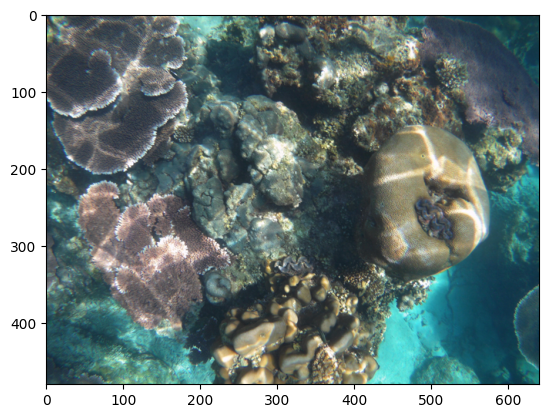

In [25]:
# #plotting input, to compare to output of cell above, for test
# plt.imshow(img.detach().permute(1,2,0))

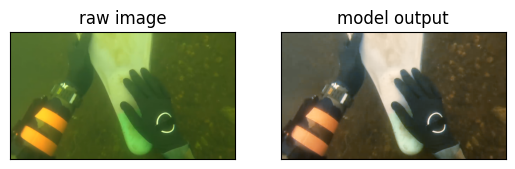

In [38]:
#Plotting images from the paper, for the final blogpost
img_idx = 15426
filename = f"{img_idx}.png"
image_dir = "/kaggle/input/uieb-dataset-raw/raw-890"
wb_image_dir = "/kaggle/input/clahe-and-wb-images/wb-images"
clahe_image_dir = "/kaggle/input/clahe-and-wb-images/clahe-images"
image_path = os.path.join(image_dir, filename)
image_wb_path = os.path.join(wb_image_dir, filename.replace('.png', '_white_balanced.png'))
image_clahe_path = os.path.join(clahe_image_dir, filename.replace('.png', '_clahe.png'))
img = plt.imread(image_path)
img_wb = plt.imread(image_wb_path)
img_clahe = plt.imread(image_clahe_path)
img = torch.from_numpy(img).float().permute(2,0,1)
img_wb = torch.from_numpy(img_wb).float().permute(2,0,1)
img_clahe = torch.from_numpy(img_clahe).float().permute(2,0,1)
output = NEW_INSTANCE(img, img_wb, img_clahe)

#creating figure with 2 slots
fig, axs = plt.subplots(1, 2)

#plotting
axs[0].imshow(img.detach().permute(1,2,0))
axs[0].set_title("raw image")
axs[0].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)
axs[1].imshow(output.detach().permute(1,2,0))
axs[1].set_title("model output")
axs[1].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)
fig.savefig(f"{img_idx}.png")